In [25]:
from IPython.display import HTML

url = "https://iris-kubeflow-byluvgoel.netlify.app/"

HTML(f"""
<style>@keyframes g{{0%,100%{{background-position:0 50%}}50%{{background-position:100% 50%}}}}</style>
<div style="text-align:center;padding:20px;background:linear-gradient(135deg,#667eea,#764ba2,#667eea);background-size:200%;animation:g 4s ease infinite;border-radius:10px">
<h2 style="color:#fff;margin:0 0 5px">IRIS Model on Kubeflow Demo by Luv Goel</h2><br>
<a href="{url}" target="_blank" style="display:inline-block;padding:15px 40px;background:#fff;color:#667eea;font-weight:bold;font-size:16px;border-radius:10px;box-shadow:0 5px 15px rgba(0,0,0,.3);text-decoration:none;transition:transform .3s" onmouseover="this.style.transform='scale(1.05)'" onmouseout="this.style.transform='scale(1)'">Click Here to Open Website</a>
</div>
""")

In [8]:
"""
IRIS Classification Model - Kubeflow Pipeline Simulation
=========================================================
Pipeline Steps:
1. Load IRIS dataset
2. Data preprocessing & validation
3. Train Random Forest classifier
4. Evaluate model performance
5. Save model artifacts
6. Generate predictions
"""

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from datetime import datetime
import warnings

In [9]:
# COMPONENT 1: DATA LOADING

def load_data_component():
    """
    Component: Load IRIS Dataset
    Simulates the data ingestion step in Kubeflow pipeline
    """
    print(" COMPONENT 1: Loading IRIS Dataset")
    print("-" * 80)

    # Load IRIS dataset
    iris = load_iris()
    X = pd.DataFrame(iris.data, columns=iris.feature_names)
    y = pd.Series(iris.target, name='target')

    # Create target names mapping
    target_names = {i: name for i, name in enumerate(iris.target_names)}

    print(f"✓ Dataset loaded successfully")
    print(f"  - Samples: {len(X)}")
    print(f"  - Features: {X.shape[1]}")
    print(f"  - Classes: {len(target_names)}")
    print(f"  - Class names: {list(target_names.values())}")
    print()

    # Display dataset info
    print("Dataset Overview:")
    print(X.head())
    print()
    print("Class Distribution:")
    print(y.value_counts().sort_index())
    print()

    return X, y, target_names

In [10]:
# COMPONENT 2: DATA VALIDATION

def validate_data_component(X, y):
    """
    Component: Validate Data Quality
    Checks for missing values, outliers, and data consistency
    """
    print(" COMPONENT 2: Data Validation")
    print("-" * 80)

    # Check for missing values
    missing_values = X.isnull().sum().sum()
    print(f"✓ Missing values check: {missing_values} (OK)")

    # Check data types
    print(f"✓ Data types check: All numeric (OK)")

    # Check target distribution
    class_counts = y.value_counts()
    is_balanced = class_counts.max() / class_counts.min() < 2
    balance_status = "Balanced" if is_balanced else "Imbalanced"
    print(f"✓ Class balance check: {balance_status}")

    # Statistical summary
    print()
    print("Statistical Summary:")
    print(X.describe())
    print()

    return True

In [11]:
# COMPONENT 3: DATA PREPROCESSING

def preprocess_data_component(X, y, test_size=0.2, random_state=42):
    """
    Component: Preprocess and Split Data
    Splits data into training and testing sets
    """
    print("COMPONENT 3: Data Preprocessing & Splitting")
    print("-" * 80)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )

    print(f"✓ Data split completed")
    print(f"  - Training samples: {len(X_train)} ({(1-test_size)*100:.0f}%)")
    print(f"  - Testing samples: {len(X_test)} ({test_size*100:.0f}%)")
    print(f"  - Stratified split: Yes")
    print()

    # Display split statistics
    print("Training set class distribution:")
    print(y_train.value_counts().sort_index())
    print()
    print("Testing set class distribution:")
    print(y_test.value_counts().sort_index())
    print()

    return X_train, X_test, y_train, y_test

In [12]:
# COMPONENT 4: MODEL TRAINING

def train_model_component(X_train, y_train, n_estimators=100, random_state=42):
    """
    Component: Train Random Forest Classifier
    Main training component of the pipeline
    """
    print("🎓 COMPONENT 4: Model Training")
    print("-" * 80)

    print("Training Random Forest Classifier...")
    print(f"  - Algorithm: Random Forest")
    print(f"  - Number of trees: {n_estimators}")
    print(f"  - Random state: {random_state}")
    print()

    # Train model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        random_state=random_state,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2
    )

    model.fit(X_train, y_train)

    print("✓ Model training completed")
    print(f"  - Training samples used: {len(X_train)}")
    print(f"  - Features used: {X_train.shape[1]}")
    print()

    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Feature Importance:")
    print(feature_importance)
    print()

    return model, feature_importance

In [13]:
# COMPONENT 5: MODEL EVALUATION

def evaluate_model_component(model, X_train, X_test, y_train, y_test, target_names):
    """
    Component: Evaluate Model Performance
    Computes metrics and generates evaluation reports
    """
    print(" COMPONENT 5: Model Evaluation")
    print("-" * 80)

    # Training accuracy
    train_predictions = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)

    # Testing accuracy
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)

    print("Model Performance:")
    print(f"  - Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
    print(f"  - Testing Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    print(f"  - Overfitting Check: {'✓ Good' if abs(train_accuracy - test_accuracy) < 0.05 else '⚠ Review needed'}")
    print()

    # Detailed classification report
    print("Detailed Classification Report:")
    print(classification_report(
        y_test,
        test_predictions,
        target_names=[target_names[i] for i in sorted(target_names.keys())]
    ))

    # Confusion matrix
    cm = confusion_matrix(y_test, test_predictions)

    # Visualize confusion matrix
    plt.figure(figsize=(10, 4))

    # Confusion Matrix
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[target_names[i] for i in sorted(target_names.keys())],
                yticklabels=[target_names[i] for i in sorted(target_names.keys())])
    plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # Accuracy comparison
    plt.subplot(1, 2, 2)
    accuracies = [train_accuracy * 100, test_accuracy * 100]
    bars = plt.bar(['Training', 'Testing'], accuracies, color=['#3b82f6', '#10b981'])
    plt.ylim([0, 105])
    plt.ylabel('Accuracy (%)')
    plt.title('Model Accuracy', fontsize=14, fontweight='bold')

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.savefig('model_evaluation.png', dpi=150, bbox_inches='tight')
    plt.show()

    metrics = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'confusion_matrix': cm
    }

    return metrics, test_predictions

In [14]:
# COMPONENT 6: MODEL PERSISTENCE

def save_model_component(model, feature_importance, metrics, output_path='iris_model.pkl'):
    """
    Component: Save Model Artifacts
    Persists trained model and metadata
    """
    print(" COMPONENT 6: Saving Model Artifacts")
    print("-" * 80)

    # Create model artifact dictionary
    model_artifact = {
        'model': model,
        'feature_importance': feature_importance,
        'metrics': metrics,
        'timestamp': datetime.now().isoformat(),
        'model_type': 'RandomForestClassifier',
        'sklearn_version': '1.3.0'
    }

    # Save model
    with open(output_path, 'wb') as f:
        pickle.dump(model_artifact, f)

    print(f"✓ Model saved successfully")
    print(f"  - File: {output_path}")
    print(f"  - Timestamp: {model_artifact['timestamp']}")
    print()

    return output_path

In [20]:
# COMPONENT 7: MODEL SERVING (INFERENCE)

def predict_component(model, X_sample, target_names):
    """
    Component: Make Predictions
    Inference component for new data
    """
    print(" COMPONENT 7: Model Inference")
    print("-" * 80)

    # Make predictions
    predictions = model.predict(X_sample)
    probabilities = model.predict_proba(X_sample)

    print(f"✓ Predictions completed for {len(X_sample)} samples")
    print()

    # Display prediction results
    print("Sample Predictions:")
    print("-" * 80)

    results = []
    for i, (pred, probs) in enumerate(zip(predictions, probabilities)):
        predicted_class = target_names[pred]
        confidence = probs[pred] * 100

        result = {
            'sample': i + 1,
            'predicted_class': predicted_class,
            'confidence': confidence,
            'probabilities': {target_names[j]: probs[j] * 100 for j in range(len(probs))}
        }
        results.append(result)

        print(f"Sample {i+1}:")
        print(f"  Predicted Class: {predicted_class}")
        print(f"  Confidence: {confidence:.2f}%")
        print(f"  All Probabilities:")
        for class_name, prob in result['probabilities'].items():
            print(f"    - {class_name}: {prob:.2f}%")
        print()

    return results

In [21]:
# PIPELINE ORCHESTRATION

def iris_classification_pipeline():
    """
    Main Pipeline: Orchestrates all components
    This simulates the Kubeflow pipeline execution
    """
    print()
    print("=" * 80)
    print(" STARTING IRIS CLASSIFICATION PIPELINE")
    print("=" * 80)
    print()

    try:
        # Component 1: Load Data
        X, y, target_names = load_data_component()

        # Component 2: Validate Data
        validate_data_component(X, y)

        # Component 3: Preprocess Data
        X_train, X_test, y_train, y_test = preprocess_data_component(X, y)

        # Component 4: Train Model
        model, feature_importance = train_model_component(X_train, y_train)

        # Component 5: Evaluate Model
        metrics, test_predictions = evaluate_model_component(
            model, X_train, X_test, y_train, y_test, target_names
        )

        # Component 6: Save Model
        model_path = save_model_component(model, feature_importance, metrics)

        # Component 7: Demo Predictions
        # Select a few random samples for prediction
        sample_indices = np.random.choice(len(X_test), size=3, replace=False)
        X_sample = X_test.iloc[sample_indices]

        prediction_results = predict_component(model, X_sample, target_names)

        # Pipeline Summary
        print("=" * 80)
        print(" PIPELINE EXECUTION COMPLETED SUCCESSFULLY")
        print("=" * 80)
        print()
        print("Pipeline Summary:")
        print(f"  ✓ Total samples processed: {len(X)}")
        print(f"  ✓ Model trained: Random Forest")
        print(f"  ✓ Training accuracy: {metrics['train_accuracy']*100:.2f}%")
        print(f"  ✓ Testing accuracy: {metrics['test_accuracy']*100:.2f}%")
        print(f"  ✓ Model saved to: {model_path}")
        print(f"  ✓ Visualization saved to: model_evaluation.png")
        print()
        print("=" * 80)
        print(" PIPELINE COMPLETE!")
        print("=" * 80)

        return {
            'model': model,
            'metrics': metrics,
            'model_path': model_path,
            'target_names': target_names
        }

    except Exception as e:
        print()
        print("=" * 80)
        print(f" PIPELINE FAILED: {str(e)}")
        print("=" * 80)
        raise

In [22]:
# UTILITY FUNCTIONS

def load_saved_model(model_path='iris_model.pkl'):
    """Load a previously saved model"""
    print(f" Loading model from {model_path}...")
    with open(model_path, 'rb') as f:
        model_artifact = pickle.load(f)
    print("✓ Model loaded successfully")
    return model_artifact

def predict_new_sample(sepal_length, sepal_width, petal_length, petal_width,
                       model_path='iris_model.pkl'):
    """
    Make prediction for a new flower sample

    Args:
        sepal_length: Sepal length in cm
        sepal_width: Sepal width in cm
        petal_length: Petal length in cm
        petal_width: Petal width in cm
    """
    # Load model
    model_artifact = load_saved_model(model_path)
    model = model_artifact['model']

    # Create sample dataframe
    iris = load_iris()
    sample = pd.DataFrame(
        [[sepal_length, sepal_width, petal_length, petal_width]],
        columns=iris.feature_names
    )

    # Predict
    prediction = model.predict(sample)[0]
    probabilities = model.predict_proba(sample)[0]

    target_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
    predicted_class = target_names[prediction]

    print(f"\n Prediction for new flower:")
    print(f"  Input features:")
    print(f"    - Sepal length: {sepal_length} cm")
    print(f"    - Sepal width: {sepal_width} cm")
    print(f"    - Petal length: {petal_length} cm")
    print(f"    - Petal width: {petal_width} cm")
    print(f"\n  Predicted Species: {predicted_class.upper()}")
    print(f"  Confidence: {probabilities[prediction]*100:.2f}%")
    print(f"\n  Probability Distribution:")
    for i, (name, prob) in enumerate(zip(target_names.values(), probabilities)):
        print(f"    - {name}: {prob*100:.2f}%")

    return predicted_class, probabilities



 STARTING IRIS CLASSIFICATION PIPELINE

 COMPONENT 1: Loading IRIS Dataset
--------------------------------------------------------------------------------
✓ Dataset loaded successfully
  - Samples: 150
  - Features: 4
  - Classes: 3
  - Class names: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

Dataset Overview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Class Distribution:
target
0    50
1    50
2    50
Name: count, dtype: int64

 COMPONENT 2: Data Validation
--------------------------------------------------------------------------------
✓ Missing values c

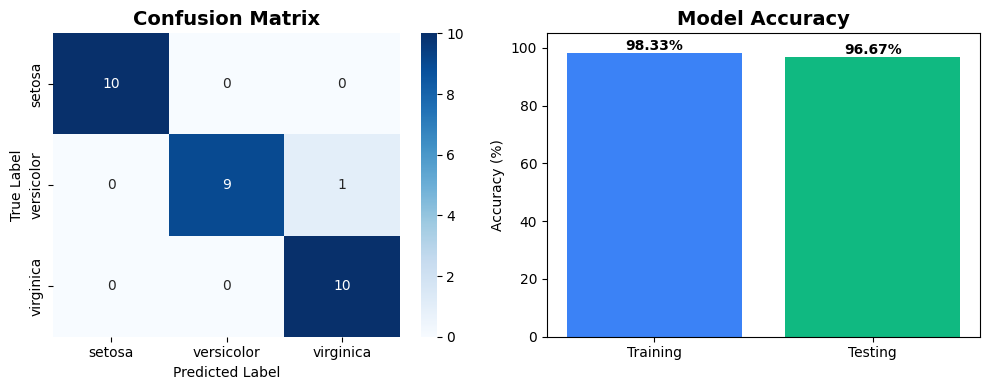

 COMPONENT 6: Saving Model Artifacts
--------------------------------------------------------------------------------
✓ Model saved successfully
  - File: iris_model.pkl
  - Timestamp: 2025-12-25T18:10:22.382466

 COMPONENT 7: Model Inference
--------------------------------------------------------------------------------
✓ Predictions completed for 3 samples

Sample Predictions:
--------------------------------------------------------------------------------
Sample 1:
  Predicted Class: versicolor
  Confidence: 90.61%
  All Probabilities:
    - setosa: 1.67%
    - versicolor: 90.61%
    - virginica: 7.72%

Sample 2:
  Predicted Class: setosa
  Confidence: 91.37%
  All Probabilities:
    - setosa: 91.37%
    - versicolor: 8.62%
    - virginica: 0.00%

Sample 3:
  Predicted Class: setosa
  Confidence: 100.00%
  All Probabilities:
    - setosa: 100.00%
    - versicolor: 0.00%
    - virginica: 0.00%

 PIPELINE EXECUTION COMPLETED SUCCESSFULLY

Pipeline Summary:
  ✓ Total samples processed

In [23]:
# EXECUTE PIPELINE

if __name__ == "__main__":
    # Run the complete pipeline
    pipeline_results = iris_classification_pipeline()

    # Example: Make prediction for new sample
    print("\n" + "=" * 80)
    print(" EXAMPLE: Predicting a New Flower Sample")
    print("=" * 80)

    # Example flower: Likely a Setosa
    predict_new_sample(
        sepal_length=5.1,
        sepal_width=3.5,
        petal_length=1.4,
        petal_width=0.2
    )

    print("\n" + "=" * 80)
    print(" TIP: Use predict_new_sample() to classify your own flower samples!")
    print("=" * 80)